In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from homer_preprocessing import import_homer_diffgene, read_homer_gene_exp
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

Goal is easy visualization of gene expression across hepatic cell types.

In [2]:
tpm = pd.read_csv(
    '/gpfs/data01/glasslab/home/h1bennet/strains_rna/results/A00_Strains_Control_WholeLiver_RNA/expression/rawT.txt',
    index_col=0,
    sep='\t')

In [3]:
# Kupffer
kc_groups = [[0,1],
             [2,3],
             [4,5]]

kc_group_labels = ['C57BL/6J Kupffer Control young',
                   'Balb/cJ Kupffer Control young',
                   'AJ Kupffer Control young']

kc_colors = ['#74c476', '#6baed6', '#de2d26']

# Hepatocyte
hep_groups = [[6,7,8],
              [9,10],
              [11,12]]

hep_group_labels = ['C57BL/6J Hepatocyte Control young',
                    'Balb/cJ Hepatocyte Control young',
                    'AJ Hepatocyte Control young']

hep_colors = ['#74c476', '#6baed6', '#de2d26']

# LSEC
lsec_groups = [[13,14,15,16],
               [17,18,19,20],
               [21,22,23,24]]

lsec_group_labels = ['C57BL/6J LSEC Control young',
                     'Balb/cJ LSEC Control young',
                     'AJ LSEC Control young']

lsec_colors = ['#74c476', '#6baed6', '#de2d26']

# Stellate
stel_groups = [[25,26,27],
               [28,29,30,31],
               [32,33,34,35]]

stel_group_labels = ['C57BL/6J Stellate Control young',
                     'Balb/cJ Stellate Control young',
                     'AJ Stellate Control young',]

stel_colors = ['#74c476', '#de2d26', '#6baed6']

Make legend

In [4]:
strain_labels = ['C57BL6/J', 'BALB/cJ', 'AJ']
strain_colors = ['#74c476', '#6baed6', '#de2d26']

In [5]:
legend_elements = []
for lab, col in  zip(strain_labels, strain_colors):
    legend_elements.append(Patch(label=lab, color=col))

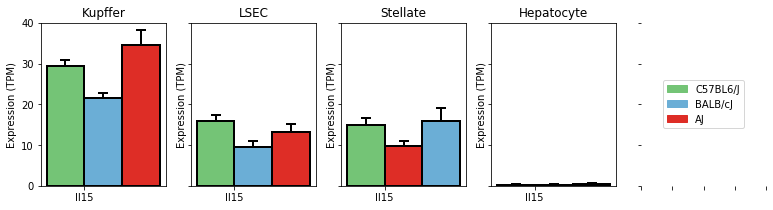

In [6]:
gene = 'Il15'

fig, axs = plt.subplots(1, 5,
                       figsize=(13, 3),
                       sharey=True)
plt.subplots_adjust(wspace=0.2)

for group, label, color, ax in zip([kc_groups,lsec_groups,stel_groups,hep_groups],
                                   [kc_group_labels,lsec_group_labels,stel_group_labels,hep_group_labels],
                                   [kc_colors,lsec_colors,stel_colors,hep_colors],
                                   axs.flatten()[:4]):

    gene_list_bar_plot([gene],
                       tpm,
                       groups=group,
                       group_labels = label,
                       colors = color,
                       width=0.2, 
                       ax=ax)
    ax.set_title(label[0].split(' ')[1])

    ax.get_legend().remove()

axs[4].legend(handles=legend_elements, loc='center');
axs[4].spines['top'].set_visible(False);
axs[4].spines['right'].set_visible(False);
axs[4].spines['left'].set_visible(False);
axs[4].spines['bottom'].set_visible(False);
axs[4].set_xticklabels('');
# axs[4].set_yticklabels('')